In [2]:
import pandas as pd
# need to rerun mixcr for '009-0231', for now wi exclude this 

samples=['009-0192',
'009-0184',
'009-0148',
'009-0171',
'009-0203',
'009-0186',
'009-0174',
'009-0109',
'009-0249',
'009-0112',
'009-0122',
'009-0202',
'009-0103']

dict={}
newDF = pd.DataFrame()



for s in samples:
    dict[s]={}
    
for s in samples:
    dict[s]['true']=newDF
    dict[s]['imrep']=newDF
    dict[s]['mixcr']=newDF
    dict[s]['true.imrep']=newDF
    dict[s]['true.mixcr']=newDF
    dict[s]['imrep.mixcr']=newDF
    
    



# BCR-Seq

In [3]:
import pandas as pd
import os

directory_true='./BCR-Seq/'




for root, dirs, files in os.walk(directory_true):
    for file in files:
        if file.endswith('.cdr3'):
            for s in samples:
                if s in file:
                    dict[s]['true']=pd.read_csv(directory_true+file)


for s in samples:
    print s,dict[s]['true'].size

009-0192 1749
009-0184 270
009-0148 2013
009-0171 183
009-0203 351
009-0186 339
009-0174 165
009-0109 669
009-0249 1137
009-0112 603
009-0122 357
009-0202 150
009-0103 27


# ImReP

In [4]:
import pandas as pd
import os

directory_imrep='./imrep/'



for root, dirs, files in os.walk(directory_imrep):
    for file in files:
        if file.endswith('.csv'):
            for s in samples:
                if s in file:
                    dict[s]['imrep']=pd.read_csv(directory_imrep+file)
                    dict[s]['imrep'] = dict[s]['imrep'].rename(columns={'relative.frequency': 'FREQ.imrep'})


dict[s]['imrep']

,CDR3,count,FREQ.imrep
0,CARGSGQRDPLDYW,377,1.0


# MiXCR

In [5]:
import pandas as pd
import os

directory_mixcr='./mixcr/'



for root, dirs, files in os.walk(directory_mixcr):
    for file in files:
        if file.endswith('.clean.cdr3'):
            for s in samples:
                if s in file:
                    dict[s]['mixcr']=pd.read_csv(directory_mixcr+file)
                    dict[s]['mixcr'] = dict[s]['mixcr'].rename(columns={'FREQ': 'FREQ.mixcr'})


dict[s]['mixcr']

,CDR3,nReads,FREQ.mixcr
0,CARGSGQRDPLDYW,1,1.0


# Merge ImReP and BCR-Seq

In [6]:
for s in samples:

    if dict[s]['imrep'].size==0:
        dict[s]['true.imrep']=pd.DataFrame()
    if dict[s]['mixcr'].size==0:
        dict[s]['true.mixcr']=pd.DataFrame()
        
    if dict[s]['imrep'].size!=0 and dict[s]['mixcr'].size!=0:
    
        dict[s]['true.imrep']=pd.merge( dict[s]['true'],dict[s]['imrep'], on='CDR3') #imrep and true
        dict[s]['true.mixcr']=pd.merge( dict[s]['true'],dict[s]['mixcr'], on='CDR3') #mixcr and true
        dict[s]['imrep.mixcr']=pd.merge( dict[s]['imrep'],dict[s]['mixcr'], on='CDR3') # mixcr and imrep
    
   
print dict[s]['true'].head()
print dict[s]['imrep'].head()
print dict[s]['mixcr'].head()
print dict[s]['true.imrep'].head()
print dict[s]['true.mixcr'].head()


                      CDR3  nReads      FREQ
0  CARRERTLFAVGSRSYYYYMDVW       1  0.000282
1       CARVLLHYYDSSGYLDYW       1  0.000282
2           CARGSGQRDPLDYW    3534  0.997460
3           CARSSGQRDPLDYW       1  0.000282
4         CAKTAASAIYDVFDVW       1  0.000282
             CDR3  count  FREQ.imrep
0  CARGSGQRDPLDYW    377         1.0
             CDR3  nReads  FREQ.mixcr
0  CARGSGQRDPLDYW       1         1.0
             CDR3  nReads     FREQ  count  FREQ.imrep
0  CARGSGQRDPLDYW    3534  0.99746    377         1.0
             CDR3  nReads_x     FREQ  nReads_y  FREQ.mixcr
0  CARGSGQRDPLDYW      3534  0.99746         1         1.0


# Summary per sample

In [7]:
print dict['009-0122']['true']

                           CDR3  nReads      FREQ
0            CATLGGVGQWLDNYFDPW       1  0.000033
1          CGKNRDYNILTAYTAYIDYW       1  0.000033
2             CTRDSPNWVPLGYFDYW       1  0.000033
3             CGKNRDYNFLTAYIDYW       4  0.000131
4             CGKNRDYNILTAYIGYW      86  0.002812
5               CGKNRDYNILTAYYW       1  0.000033
6             CGKNRDSNILTAYIDYW       2  0.000065
7     CGKNRDYNILTAYIDYWGQGTLDYW       2  0.000065
8             CGINRDYNILTAYIDYW       2  0.000065
9             CGKNRDYNIVTADMGYW       6  0.000196
10            CGKNRDYNIWTAYIDYW       2  0.000065
11            CRTNRDYNILTAYIDYW       2  0.000065
12            CGKTRDDNILTAYIDYW       2  0.000065
13            CGKNRDYNFLTACIDFW       1  0.000033
14            CGTNRDYNILTAYIDYW       2  0.000065
15            CGKNRDSNILPAYIDYW       2  0.000065
16            CSTNRDYNILTAYIDYW       3  0.000098
17                CGKNRDYNNIDYW       2  0.000065
18             CGKNRDYNILTYIDYW       6  0.000196


In [8]:
file=open('BCR.Seq.validation.csv',"w")
file.write("ID,n_true,n_imrep_true,n_mixcr_true,max_true,min_true,sum_imrep_true,max_imrep_true,min_imrep_true,sum_mixcr_true,max_mixcr_true,min_mixcr_true")
file.write("\n")

for s in samples:
    
    
    
    sum_imrep_true='0'
    max_imrep_true='0'
    min_imrep_true='0'
    sum_mixcr_true='0'
    max_mixcr_true='0'
    min_mixcr_true='0'
    
    sdi_imrep='0'
    sdi_mixcr='0'
    
    ID=s
    n_true=str(dict[s]['true']['FREQ'].size)
    
    if dict[s]['true.imrep'].size==0:
        n_imrep_true='0' 
    else:
        n_imrep_true=str(dict[s]['true.imrep']['FREQ.imrep'].size)
        
    if dict[s]['true.mixcr'].size==0:
        n_mixcr_true='0' 
    else:
        n_mixcr_true=str(dict[s]['true.mixcr']['FREQ.mixcr'].size) 
        
        
    max_true=str(dict[s]['true']['FREQ'].max()*100)
    min_true=str(dict[s]['true']['FREQ'].min()*100)
    
    
    #sum max min
    if dict[s]['true.imrep'].size==0:
        sum_imrep_true='0'
        max_imrep_true='0'
        min_imrep_true='0'
    else:
        sum_imrep_true=str(dict[s]['true.imrep']['FREQ'].sum()*100)
        max_imrep_true=str(dict[s]['true.imrep']['FREQ'].max()*100)
        min_imrep_true=str(dict[s]['true.imrep']['FREQ'].min()*100)
        
    if dict[s]['true.mixcr'].size==0:
        sum_mixcr_true='0'
        max_mixcr_true='0'
        min_mixcr_true='0'
    else:
        sum_mixcr_true=str(dict[s]['true.mixcr']['FREQ'].sum()*100)
        max_mixcr_true=str(dict[s]['true.mixcr']['FREQ'].max()*100)
        min_mixcr_true=str(dict[s]['true.imrep']['FREQ'].min()*100)
        
    
    
    #print sum_imrep,sum_mixcr
    
    file.write(ID+","+n_true+","+n_imrep_true+","+n_mixcr_true+","+max_true+","+min_true+","+sum_imrep_true+","+max_imrep_true+","+min_imrep_true+","+sum_mixcr_true+","+max_mixcr_true+","+min_mixcr_true)
    file.write("\n")

file.close()

In [9]:
import pandas as pd
data_portion=pd.read_csv("BCR.Seq.validation.csv")
data_portion

,ID,n_true,n_imrep_true,n_mixcr_true,max_true,min_true,sum_imrep_true,max_imrep_true,min_imrep_true,sum_mixcr_true,max_mixcr_true,min_mixcr_true
0,009-0192,583,34,32,0.636943,0.159236,7.484076,0.636943,0.159236,7.961783,0.636943,0.159236
1,009-0184,90,1,0,1.111111,1.111111,1.111111,1.111111,1.111111,0.000000,0.000000,0.000000
2,009-0148,671,0,0,1.451379,0.145138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,009-0171,61,1,0,2.941176,1.470588,2.941176,2.941176,2.941176,0.000000,0.000000,0.000000
4,009-0203,117,0,0,3.333333,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,009-0186,113,15,5,16.666667,0.666667,28.666667,16.666667,0.666667,20.000000,16.666667,0.666667
6,009-0174,55,1,0,62.542955,0.343643,62.542955,62.542955,62.542955,0.000000,0.000000,0.000000
7,009-0109,223,4,1,96.663541,0.007814,96.702610,96.663541,0.007814,0.007814,0.007814,0.007814
8,009-0249,379,1,1,97.675134,0.003075,97.675134,97.675134,97.675134,97.675134,97.675134,97.675134
9,009-0112,201,1,1,97.748685,0.001826,97.748685,97.748685,97.748685,97.748685,97.748685,97.748685


# Diversity 


In [70]:
from math import log as ln
def p(n, N):
    """ Relative abundance """
    if n is  0:
        return 0
    else:
        return (float(n)/N) * ln(float(n)/N)

def sdi(data):
    N = sum(data)
    if len(data)==1:
        return 0.0
    return -sum(p(n, N) for n in data if n is not 0)

print sdi([0.5,0.5])
print sdi([0.5])

0.69314718056
0.0


# Clonotype frequency  ImReP

In [71]:
bigdata_imrep = pd.DataFrame()

for s in samples:
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats

    bigdata_imrep = bigdata_imrep.append(dict[s]['true.imrep'], ignore_index=True)
    
   
print bigdata_imrep.size


315


(0.9720194468069536, 4.39872814445127e-40)


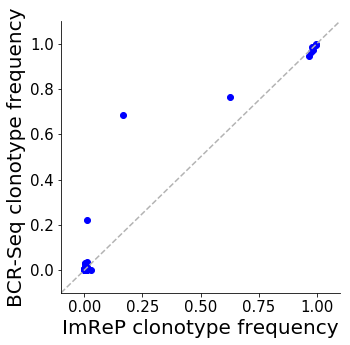

In [72]:
import numpy as np
import matplotlib.pyplot as plt




mean, cov = [0, 0], [(1, .6), (.6, 1)]
x, y = np.random.multivariate_normal(mean, cov, 100).T
y += x + 1

f, ax = plt.subplots(figsize=(5, 5))

ax.scatter(x="FREQ", y="FREQ.imrep", data=bigdata_imrep, c="blue")
ax.set(xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))




# Plot your initial diagonal line based on the starting
# xlims and ylims.
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".7")

def on_change(axes):
    # When this function is called it checks the current
    # values of xlim and ylim and modifies diag_line
    # accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)

ax.set_ylabel('BCR-Seq clonotype frequency', fontsize='large')   # relative to plt.rcParams['font.size']
ax.set_xlabel('ImReP clonotype frequency', fontsize='large')   # relative to plt.rcParams['font.size']




# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)


plt.savefig("correlation.imrep.pdf", bbox_inches='tight')

print stats.pearsonr(bigdata_imrep['FREQ'], bigdata_imrep['FREQ.imrep'])


In [73]:
bigdata_mixcr = pd.DataFrame()

for s in samples:
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy import stats

    bigdata_mixcr = bigdata_mixcr.append(dict[s]['true.mixcr'], ignore_index=True)
    
   
print bigdata_mixcr.size

225


(0.8733532567497009, 5.077285964351194e-15)


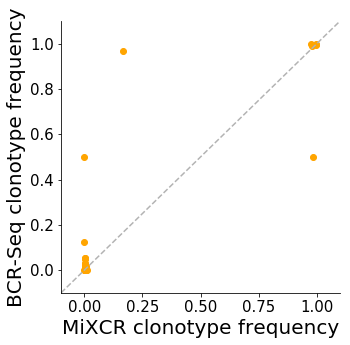

In [74]:
import numpy as np
import matplotlib.pyplot as plt



f, ax = plt.subplots(figsize=(5, 5))

ax.scatter(x="FREQ", y="FREQ.mixcr", data=bigdata_mixcr, c="orange")
ax.set(xlim=(-0.1, 1.1), ylim=(-0.1, 1.1))




# Plot your initial diagonal line based on the starting
# xlims and ylims.
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".7")

def on_change(axes):
    # When this function is called it checks the current
    # values of xlim and ylim and modifies diag_line
    # accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)


ax.set_ylabel('BCR-Seq clonotype frequency', fontsize='large')   # relative to plt.rcParams['font.size']
ax.set_xlabel('MiXCR clonotype frequency', fontsize='large')   # relative to plt.rcParams['font.size']




# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

plt.savefig("correlation.mixcr.pdf", bbox_inches='tight')


print stats.pearsonr(bigdata_mixcr['FREQ'], bigdata_mixcr['FREQ.mixcr'])


In [75]:
bigdata_true=pd.DataFrame()
for s in samples:
    bigdata_true = bigdata_true.append(dict[s]['true'], ignore_index=True)

print bigdata_true['FREQ'].size

2671


In [76]:
import numpy as np

file=open('portion.captured.frequency.csv',"w")
file2=open('portion.captured.items.csv',"w")

file.write("th,imrep_portion_frequency,mixcr_portion_frequency\n")
file2.write("th,imrep_portion_items,mixcr_portion_items\n")

previous=0

for th in np.linspace(0.1,0,2000):
    
    
    
    k_imrep=0
    k_mixcr=0
    k_true=0
    
    s_imrep=0
    s_mixcr=0
    s_true=0
    for s in samples:
        if dict[s]['true.imrep'].size !=0:
            freq_local_imrep=dict[s]['true.imrep']['FREQ']
            for i in freq_local_imrep:
                if i>=th:
                    k_imrep+=1.0
                    s_imrep+=i
        if dict[s]['true.mixcr'].size !=0:
            freq_local_mixcr=dict[s]['true.mixcr']['FREQ']
            for i in freq_local_mixcr:
                if i>=th:
                    k_mixcr+=1.0
                    s_mixcr+=i
        if dict[s]['true'].size !=0:
            freq_local_true=dict[s]['true']['FREQ']
            for i in freq_local_true:
                if i>=th:
                    k_true+=1.0
                    s_true+=i


    imrep_portion=str((k_imrep/k_true))
    mixcr_portion=str((k_mixcr/k_true))
    file2.write(str(th)+","+imrep_portion+","+mixcr_portion)
    file2.write("\n")
    
    imrep_portion2=str((s_imrep/s_true))
    mixcr_portion2=str((s_mixcr/s_true))
    file.write(str(th)+","+imrep_portion2+","+mixcr_portion2)
    file.write("\n")
    
    
file.close()
file2.close()

In [77]:
import pandas as pd
data_portion=pd.read_csv("portion.captured.items.csv")
data_portion.tail()

,th,imrep_portion_items,mixcr_portion_items
1995,0.00020,0.032731,0.024266
1996,0.00015,0.032733,0.023459
1997,0.00010,0.032154,0.023044
1998,0.00005,0.028007,0.020202
1999,0.00000,0.023587,0.016848


In [95]:
data_portion.loc[data_portion['imrep_portion_items'] >=0.5].tail()

,th,imrep_portion_items,mixcr_portion_items
1514,0.024262,0.529412,0.352941
1515,0.024212,0.529412,0.352941
1516,0.024162,0.529412,0.352941
1517,0.024112,0.529412,0.352941
1518,0.024062,0.529412,0.352941


In [99]:
data_portion.loc[data_portion['mixcr_portion_items'] >=0.5].tail()

,th,imrep_portion_items,mixcr_portion_items
1407,0.029615,0.8,0.6
1408,0.029565,0.8,0.6
1409,0.029515,0.8,0.6
1410,0.029465,0.8,0.6
1411,0.029415,0.8,0.6


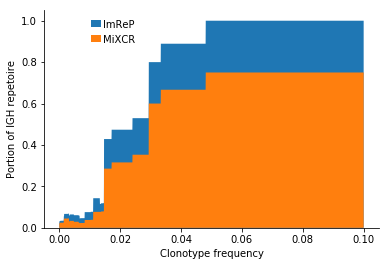

In [78]:
import numpy as np
import matplotlib.pyplot as plt


#fig, ax = plt.subplots()
fig, ax = plt.subplots(nrows=1, ncols=1)


ax.stackplot(data_portion['th'], data_portion['imrep_portion_items'],labels=["ImReP"])
ax.stackplot(data_portion['th'], data_portion['mixcr_portion_items'],labels=["MiXCR"])

#ax.invert_xaxis()

plt.legend(bbox_to_anchor=(0.3,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1)


locs, labels = plt.xticks()
#plt.xticks(np.arange(0, 10, step=0.1))


ax.set_ylabel('Portion of IGH repetoire', fontsize='medium')   # relative to plt.rcParams['font.size']
ax.set_xlabel('Clonotype frequency', fontsize='medium')   # relative to plt.rcParams['font.size']

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("portion.captured.items.pdf", bbox_inches='tight')


In [79]:
import pandas as pd
data_portion2=pd.read_csv("portion.captured.frequency.csv")
data_portion2.tail()

,th,imrep_portion_frequency,mixcr_portion_frequency
1995,0.00020,0.534770,0.402387
1996,0.00015,0.534386,0.402080
1997,0.00010,0.534216,0.401952
1998,0.00005,0.533276,0.401246
1999,0.00000,0.532692,0.400805


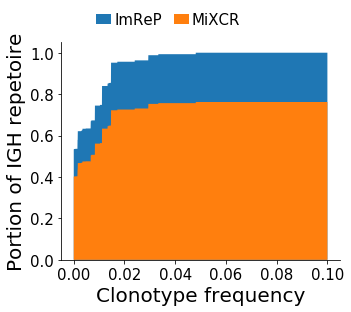

In [67]:
import numpy as np
import matplotlib.pyplot as plt


#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(5, 4))


ax.stackplot(data_portion2['th'], data_portion2['imrep_portion_frequency'],labels=["ImReP"])
ax.stackplot(data_portion2['th'], data_portion2['mixcr_portion_frequency'],labels=["MiXCR"])

#ax.invert_xaxis()

plt.legend(bbox_to_anchor=(0.69,1.2), frameon=False, ncol=2, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})


ax.set_ylabel('Portion of IGH repetoire', fontsize='large')   # relative to plt.rcParams['font.size']
ax.set_xlabel('Clonotype frequency', fontsize='large')   # relative to plt.rcParams['font.size']


locs, labels = plt.xticks()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



# setting label sizes after creation
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)


plt.savefig("portion.captured.frequency.pdf", bbox_inches='tight')


# Diversity
## Not included in the analysis

In [36]:

file=open('BCR.Seq.validation.diversity.csv',"w")
file.write("ID,sdi_imrep,sdi_mixcr,sdi_true\n")


for s in samples:
    
    
    
    
    
    sdi_imrep='0'
    sdi_mixcr='0'
    sdi_true=str(sdi(dict[s]['true']['FREQ']))
    
    ID=s
    n_true=str(dict[s]['true'].size)
    n_imrep_true=str(dict[s]['true.imrep'].size)
    n_mixcr_true=str(dict[s]['true.mixcr'].size)
    max_true=str(dict[s]['true']['FREQ'].max())
    min_true=str(dict[s]['true']['FREQ'].max())
    
    #diversity
    if dict[s]['imrep'].size==0:
        sdi_imrep='0'
    else:
        sdi_imrep=str(sdi(dict[s]['imrep']['FREQ.imrep']))
        
        
    if dict[s]['mixcr'].size==0:
        sdi_mixcr='0'
    else:
        sdi_mixcr=str(sdi(dict[s]['mixcr']['FREQ.mixcr']))
        
    file.write(s+","+sdi_true+","+sdi_imrep+","+sdi_mixcr)
    file.write("\n")
file.close()

In [37]:
import pandas as pd
data_validation=pd.read_csv('BCR.Seq.validation.diversity.csv')
data_validation.head()

,ID,sdi_imrep,sdi_mixcr,sdi_true
0,009-0192,6.333790,4.967254,3.961716
1,009-0184,4.499810,1.368922,1.386294
2,009-0148,6.483714,2.027707,1.098612
3,009-0171,4.076801,1.248353,0.295811
4,009-0203,4.741282,0.000000,1.039721


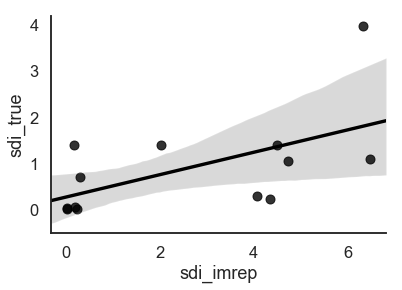

(0.5729594130499468, 0.040677607103544865)

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="sdi_imrep", y="sdi_true", data=data_validation,color="black")
g.set(xlabel='sdi_imrep', ylabel='sdi_true')
g=sns.despine()
plt.show(g)
stats.pearsonr(data_validation['sdi_imrep'], data_validation['sdi_true'])

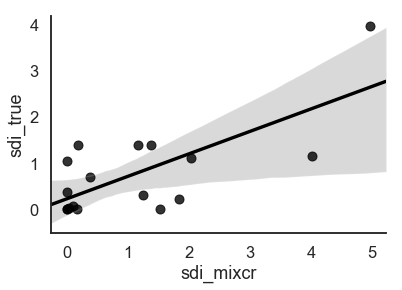

(0.7180895820709136, 0.0011683436449135044)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

g=sns.set_style("white")
g=sns.set_context("talk")
g=sns.regplot(x="sdi_mixcr", y="sdi_true", data=data_validation,color="black")
g.set(xlabel='sdi_mixcr', ylabel='sdi_true')
g=sns.despine()
plt.show(g)
stats.pearsonr(data_validation['sdi_mixcr'], data_validation['sdi_true'])

In [33]:
import pandas as pd
mixcr_imrep=pd.merge(imrep_data, mixcr_data, on='CDR3')
mixcr_imrep.head()

,CDR3,count,relative.frequency.imrep,nReads,FREQ_mixcr
0,CAKDQEAGFDIW,14,0.001809,4,0.004957
1,CAKGDINWYGPDYW,53,0.006849,3,0.003717
2,CAKNGDFDYW,93,0.012019,46,0.057001
3,CANKLNWGDLFDYW,14,0.001809,3,0.003717
4,CARDGVVGDYFWYFDLW,35,0.004523,2,0.002478


In [42]:
total_imrep = imrep_true['FREQ'].sum()
total_mixcr = mixcr_true['FREQ'].sum()

max_imrep = imrep_true['FREQ'].max()
max_mixcr = mixcr_true['FREQ'].max()
max_true=bcr_data['FREQ'].max()


min_imrep = imrep_true['FREQ'].min()
min_mixcr = mixcr_true['FREQ'].min()
min_true=bcr_data['FREQ'].min()


n_true=bcr_data.size
n_mixcr=mixcr_data.size
n_imrep=imrep_data.size


print total_imrep,total_mixcr
print max_imrep,max_mixcr,max_true
print min_imrep,min_mixcr,min_true
print n_imrep,n_mixcr,n_true


0.275 0.3500000000000001
0.05 0.05 0.05
0.025 0.025 0.025
1575 231 105
